In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from datetime import date, timedelta
from scipy.optimize import minimize

In [3]:

start_date = "2015-01-01"
end_date = "2020-01-01"

stocks_tickers = [
    "GAZ",
    "ADI",
    "ATL",
    "ATW",
    "BOA",
    "BCP",
    "BCI",
    "CMA",
    "CSR",
    "ADH",
    "HPS",
    "IAM",
    "LBV",
    "LHM",
    "MNG",
    "SID"
]

date_range = pd.date_range(start=start_date, end=end_date, name="Date")

filtered_dates = date_range[date_range.weekday < 5]

main_df = pd.DataFrame({"Date": filtered_dates})

def load_ticker_df(main_df, ticker, is_an_index=False):
    base_path = "indexes/" if is_an_index else "stocks/"
    ticker_df = pd.read_csv(base_path + ticker + ".csv", dtype={"Dernier": str})
    ticker_df = ticker_df[["Date", "Dernier"]]
    ticker_df["Date"] = pd.to_datetime(ticker_df["Date"], format="%d/%m/%Y")
    ticker_df.rename(columns={"Dernier": ticker}, inplace=True)
    ticker_df[ticker] = ticker_df[ticker].str.replace(".", "")
    ticker_df[ticker] = pd.to_numeric(ticker_df[ticker].str.replace(",", "."))
    main_df = pd.merge(main_df, ticker_df, on="Date", how="left")
    return main_df

for n, ticker in enumerate(stocks_tickers):
    main_df = load_ticker_df(main_df, ticker)

main_df = main_df.sort_values(by=["Date"])

print(len(main_df))

main_df.head(1000)

1305


,Date,GAZ,ADI,ATL,ATW,BOA,BCP,BCI,CMA,CSR,ADH,HPS,IAM,LBV,LHM,MNG,SID
0,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,1999.0,283.0,68.80,343.90,215.19,211.50,710.0,NaN,NaN,37.50,375.0,115.00,NaN,NaN,964.0,950.0
2,2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-06,NaN,275.0,65.16,343.90,211.74,214.50,712.0,NaN,111.0,38.00,370.0,114.75,NaN,1445.0,1019.0,995.0
4,2015-01-07,NaN,280.0,68.60,348.90,214.65,217.00,NaN,NaN,NaN,39.00,371.0,116.60,NaN,1431.0,989.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-25,2947.0,96.0,61.89,431.10,180.18,272.30,710.0,1450.0,167.0,13.22,2280.0,144.35,NaN,1550.0,1130.0,525.0
996,2018-10-26,NaN,95.0,61.70,430.25,180.13,271.05,739.0,1430.0,169.0,13.20,2300.0,141.70,1997.0,1598.0,1130.0,NaN
997,2018-10-29,NaN,95.0,NaN,430.20,180.72,271.00,NaN,1450.0,169.0,13.20,NaN,140.00,NaN,1570.0,1120.0,515.0
998,2018-10-30,NaN,91.0,60.00,426.00,180.23,268.00,NaN,1425.0,163.0,13.07,2300.0,138.10,1965.0,1570.0,1120.0,519.0


In [4]:
filled_main_df = main_df.ffill().bfill()
filled_main_df.head(1000)

,Date,GAZ,ADI,ATL,ATW,BOA,BCP,BCI,CMA,CSR,ADH,HPS,IAM,LBV,LHM,MNG,SID
0,2015-01-01,1999.0,283.0,68.80,343.90,215.19,211.50,710.0,995.0,111.0,37.50,375.0,115.00,1314.0,1445.0,964.0,950.0
1,2015-01-02,1999.0,283.0,68.80,343.90,215.19,211.50,710.0,995.0,111.0,37.50,375.0,115.00,1314.0,1445.0,964.0,950.0
2,2015-01-05,1999.0,283.0,68.80,343.90,215.19,211.50,710.0,995.0,111.0,37.50,375.0,115.00,1314.0,1445.0,964.0,950.0
3,2015-01-06,1999.0,275.0,65.16,343.90,211.74,214.50,712.0,995.0,111.0,38.00,370.0,114.75,1314.0,1445.0,1019.0,995.0
4,2015-01-07,1999.0,280.0,68.60,348.90,214.65,217.00,712.0,995.0,111.0,39.00,371.0,116.60,1314.0,1431.0,989.0,995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-25,2947.0,96.0,61.89,431.10,180.18,272.30,710.0,1450.0,167.0,13.22,2280.0,144.35,1986.0,1550.0,1130.0,525.0
996,2018-10-26,2947.0,95.0,61.70,430.25,180.13,271.05,739.0,1430.0,169.0,13.20,2300.0,141.70,1997.0,1598.0,1130.0,525.0
997,2018-10-29,2947.0,95.0,61.70,430.20,180.72,271.00,739.0,1450.0,169.0,13.20,2300.0,140.00,1997.0,1570.0,1120.0,515.0
998,2018-10-30,2947.0,91.0,60.00,426.00,180.23,268.00,739.0,1425.0,163.0,13.07,2300.0,138.10,1965.0,1570.0,1120.0,519.0


In [5]:
filled_main_df = filled_main_df.set_index("Date")

returns = filled_main_df.pct_change()

returns.head(1000)

,GAZ,ADI,ATL,ATW,BOA,BCP,BCI,CMA,CSR,ADH,HPS,IAM,LBV,LHM,MNG,SID
Date,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-06,0.000000,-0.028269,-0.052907,0.000000,-0.016032,0.014184,0.002817,0.000000,0.000000,0.013333,-0.013333,-0.002174,0.000000,0.000000,0.057054,0.047368
2015-01-07,0.000000,0.018182,0.052793,0.014539,0.013743,0.011655,0.000000,0.000000,0.000000,0.026316,0.002703,0.016122,0.000000,-0.009689,-0.029441,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-25,0.000679,-0.010309,0.044204,0.000232,-0.005684,0.000735,-0.053333,0.013986,-0.011834,-0.020741,-0.008696,-0.004483,0.000000,-0.012739,-0.017391,-0.022346
2018-10-26,0.000000,-0.010417,-0.003070,-0.001972,-0.000278,-0.004591,0.040845,-0.013793,0.011976,-0.001513,0.008772,-0.018358,0.005539,0.030968,0.000000,0.000000
2018-10-29,0.000000,0.000000,0.000000,-0.000116,0.003275,-0.000184,0.000000,0.013986,0.000000,0.000000,0.000000,-0.011997,0.000000,-0.017522,-0.008850,-0.019048


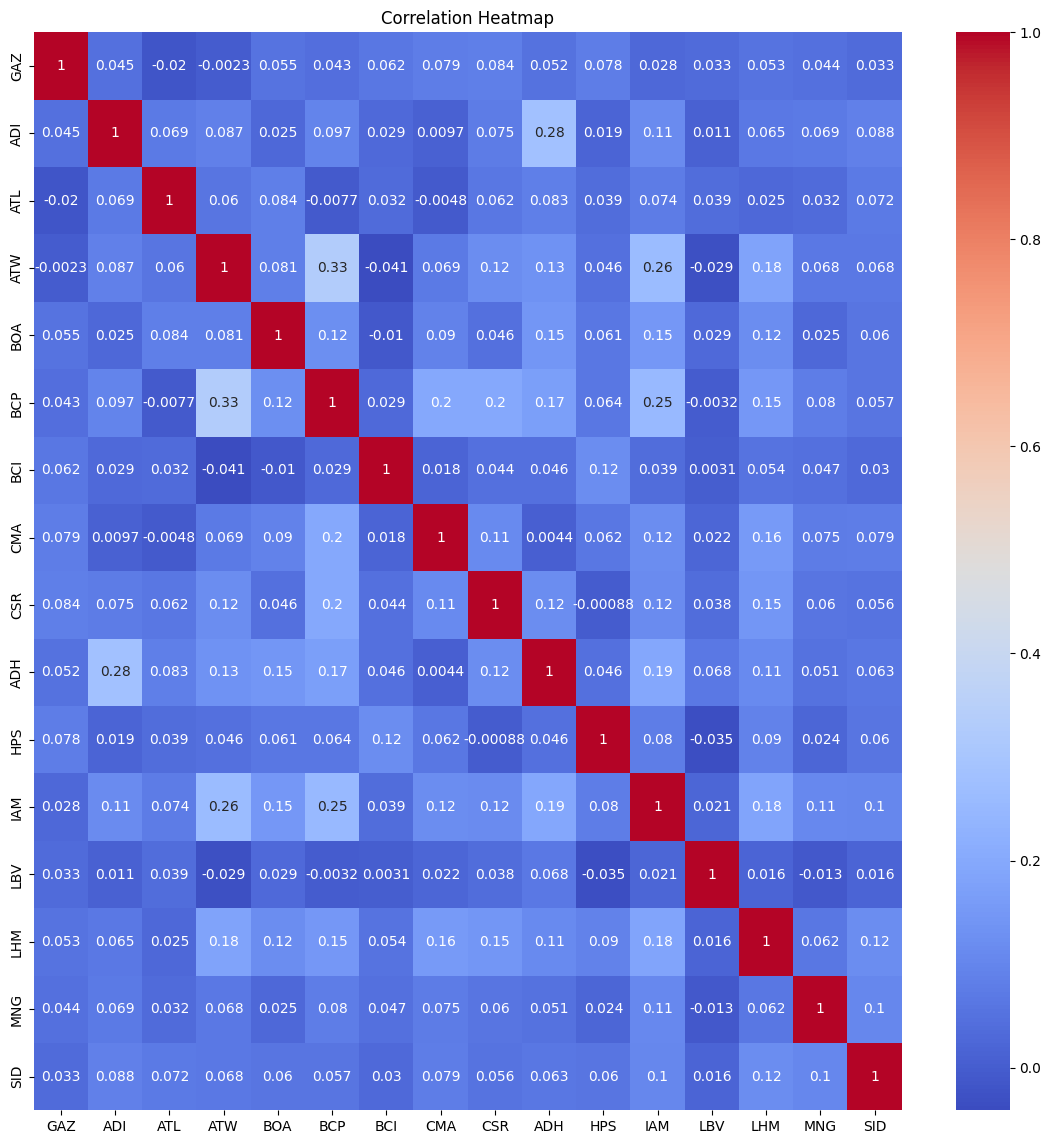

In [6]:
corr_matrix = returns.corr()

corr_matrix.head(100)

plt.figure(figsize=(14, 14))

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

plt.title("Correlation Heatmap")

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

In [7]:
cov_matrix = returns.cov() * 252

cov_matrix.head(1000)

,GAZ,ADI,ATL,ATW,BOA,BCP,BCI,CMA,CSR,ADH,HPS,IAM,LBV,LHM,MNG,SID
GAZ,0.110857,0.008433,-0.001985,-0.000115,0.003562,0.002449,0.007181,0.007855,0.007811,0.005978,0.007873,0.001191,0.003223,0.005368,0.006196,0.004605
ADI,0.008433,0.310072,0.011676,0.007420,0.002647,0.009193,0.005635,0.001623,0.011665,0.054614,0.003274,0.008248,0.001762,0.010896,0.016094,0.020545
ATL,-0.001985,0.011676,0.091365,0.002799,0.004899,-0.000399,0.003406,-0.000432,0.005231,0.008675,0.003622,0.002902,0.003454,0.002243,0.004069,0.009186
ATW,-0.000115,0.007420,0.002799,0.023597,0.002414,0.008689,-0.002203,0.003171,0.005165,0.006949,0.002145,0.005209,-0.001334,0.008326,0.004369,0.004394
BOA,0.003562,0.002647,0.004899,0.002414,0.037479,0.004084,-0.000704,0.005246,0.002475,0.009771,0.003589,0.003718,0.001650,0.006990,0.002066,0.004840
BCP,0.002449,0.009193,-0.000399,0.008689,0.004084,0.029118,0.001752,0.010030,0.009434,0.010056,0.003304,0.005618,-0.000159,0.007715,0.005758,0.004071
BCI,0.007181,0.005635,0.003406,-0.002203,-0.000704,0.001752,0.121338,0.001837,0.004329,0.005524,0.012620,0.001743,0.000322,0.005720,0.006845,0.004407
CMA,0.007855,0.001623,-0.000432,0.003171,0.005246,0.010030,0.001837,0.090296,0.009499,0.000455,0.005687,0.004711,0.001979,0.014387,0.009534,0.009928
CSR,0.007811,0.011665,0.005231,0.005165,0.002475,0.009434,0.004329,0.009499,0.078823,0.011572,-0.000076,0.004209,0.003140,0.012341,0.007029,0.006617
ADH,0.005978,0.054614,0.008675,0.006949,0.009771,0.010056,0.005524,0.000455,0.011572,0.120267,0.004817,0.008756,0.006986,0.011872,0.007425,0.009183


In [8]:
risk_free_rate = 0

def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)


def expected_return(weights, returns):
    return np.sum(returns.mean() * weights) * 252

def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, returns) - risk_free_rate) / standard_deviation(
        weights, cov_matrix
    )

def print_optimal_weights_results(optimal_weights):
    print("Optimal Weights:")
    for ticker, weight in zip(stocks_tickers, optimal_weights):
        print(f"{ticker}: {weight:.4f}")

    optimal_portfolio_return = expected_return(optimal_weights, returns)
    optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
    optimal_sharpe_ratio = sharpe_ratio(
        optimal_weights, returns, cov_matrix, risk_free_rate
    )
    print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
    print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
    print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

In [9]:
def neg_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, returns, cov_matrix, risk_free_rate)


def minimum_variance(weights, returns, cov_matrix, risk_free_rate):
    return np.dot(weights.T, np.dot(cov_matrix, weights))


def optimize_weights(
    objective,
    constraints={"type": "eq", "fun": lambda weights: np.sum(weights) - 1},
    bounds=[(0, 1) for _ in range(len(stocks_tickers))],
):
    initial_weights = np.array([1 / len(stocks_tickers)] * len(stocks_tickers))
    max_sharpe_optimized_results = minimize(
        objective,
        initial_weights,
        args=(returns, cov_matrix, risk_free_rate),
        method="SLSQP",
        constraints=constraints,
        bounds=bounds,
    )
    return max_sharpe_optimized_results.x

Optimize for Max Sharpe Ratio

In [10]:
max_sharpe_optimal_weights = optimize_weights(neg_sharpe_ratio)

Optimize for Min Variance

In [11]:
minimum_variance_optimal_weights = optimize_weights(minimum_variance)

Optimal Weights:
GAZ: 0.0686
ADI: 0.0000
ATL: 0.0134
ATW: 0.1664
BOA: 0.0000
BCP: 0.0000
BCI: 0.0000
CMA: 0.0551
CSR: 0.1149
ADH: 0.0000
HPS: 0.3498
IAM: 0.0806
LBV: 0.1483
LHM: 0.0000
MNG: 0.0029
SID: 0.0000
Expected Annual Return: 0.2590
Expected Volatility: 0.1329
Sharpe Ratio: 1.9490


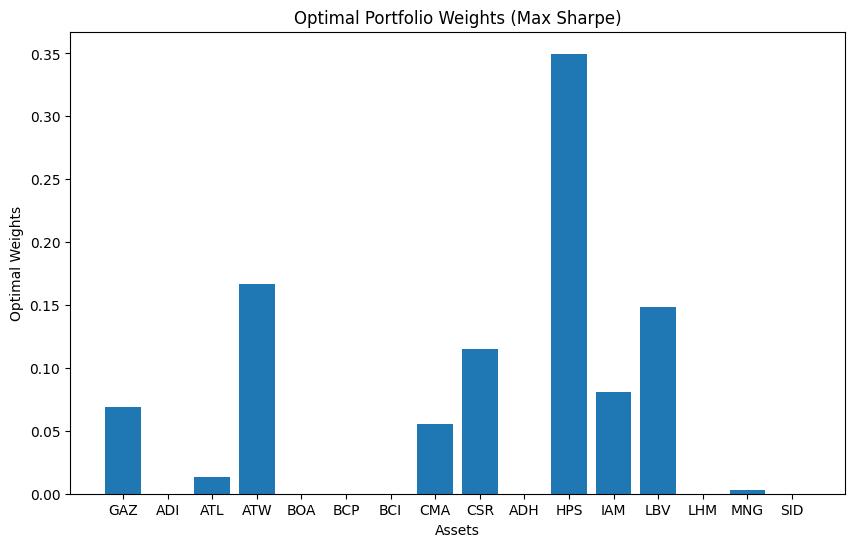

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(stocks_tickers, max_sharpe_optimal_weights)

print_optimal_weights_results(max_sharpe_optimal_weights)

plt.xlabel("Assets")
plt.ylabel("Optimal Weights")
plt.title("Optimal Portfolio Weights (Max Sharpe)")

plt.show()

Optimal Weights:
GAZ: 0.0439
ADI: 0.0005
ATL: 0.0512
ATW: 0.1923
BOA: 0.1149
BCP: 0.0907
BCI: 0.0464
CMA: 0.0285
CSR: 0.0314
ADH: 0.0000
HPS: 0.0435
IAM: 0.2547
LBV: 0.0775
LHM: 0.0002
MNG: 0.0139
SID: 0.0104
Expected Annual Return: 0.0956
Expected Volatility: 0.0848
Sharpe Ratio: 1.1274


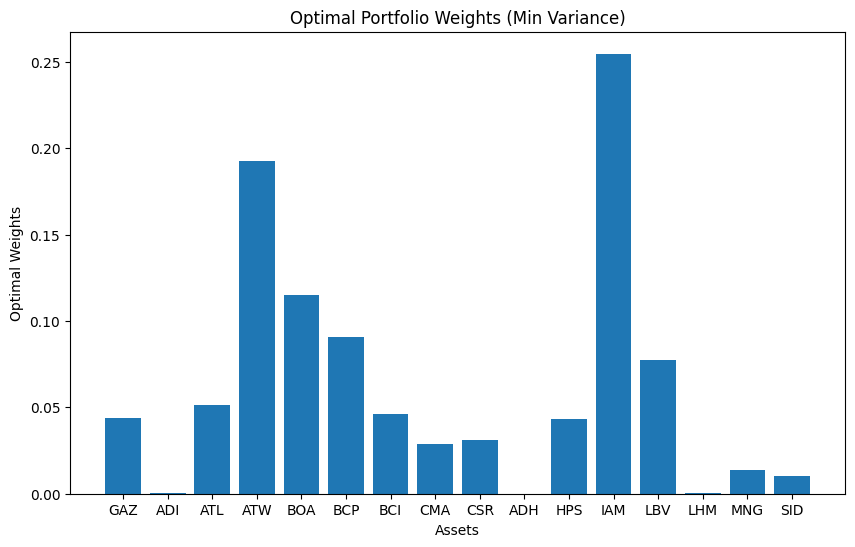

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(stocks_tickers, minimum_variance_optimal_weights)

print_optimal_weights_results(minimum_variance_optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights (Min Variance)')

plt.show()

In [14]:
expected_returns = returns.mean()

min_variance_risk = standard_deviation(minimum_variance_optimal_weights, cov_matrix)
max_sharpe_ratio_risk = standard_deviation(max_sharpe_optimal_weights, cov_matrix)

frontier_risks = np.linspace(min_variance_risk, max_sharpe_ratio_risk, 100).tolist()
frontier_returns = []

for r in frontier_risks:
    cons = (
        {"type": "eq", "fun": lambda weights: np.sum(weights) - 1},
        {"type": "eq", "fun": lambda w: standard_deviation(w, cov_matrix) - r},
    )

    optimal_weights = optimize_weights(neg_sharpe_ratio, cons)

    re = expected_return(optimal_weights, returns)

    frontier_returns.append(re)


for r in np.linspace(min_variance_risk, max_sharpe_ratio_risk * 1.25, 100):
    cons = (
        {"type": "eq", "fun": lambda weights: np.sum(weights) - 1},
        {"type": "eq", "fun": lambda w: standard_deviation(w, cov_matrix) - r},
    )

    optimal_weights = optimize_weights(sharpe_ratio, cons)

    re = expected_return(optimal_weights, returns)
    frontier_returns.append(re)
    frontier_risks.append(r)


bounds = [(0, 0.1) for _ in range(len(stocks_tickers))]

bounds[3] = (0, 0.2) # ATW
bounds[11] = (0, 0.2) # IAM


regulation_compliant_max_sharpe_optimal_weights = optimize_weights(
    objective=neg_sharpe_ratio,
    bounds=bounds,
)

regulation_compliant_max_sharpe_optimal_return = expected_return(
    regulation_compliant_max_sharpe_optimal_weights, returns
)

regulation_compliant_max_sharpe_optimal_risk = standard_deviation(
    regulation_compliant_max_sharpe_optimal_weights, cov_matrix
)

frontier_returns.append(regulation_compliant_max_sharpe_optimal_return)
frontier_risks.append(regulation_compliant_max_sharpe_optimal_risk)

# Create DataFrame for efficient frontier data
efficient_frontier_df = pd.DataFrame(
    {
        "Return": frontier_returns,
        "Risk": frontier_risks,
    }
)

fig = px.scatter(
    efficient_frontier_df,
    x="Risk",
    y="Return",
    color="Return",
    color_continuous_scale=px.colors.sequential.Plasma,  # You can use other color scales
)
fig.update_traces(marker=dict(size=8, opacity=0.8))
fig.update_layout(
    title="Efficient Frontier",
    xaxis_title="Standard Deviation of Portfolio (Risk)",
    yaxis_title="Expected Portfolio Return",
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell"),
    hovermode="closest",
)
fig.show()

Optimal Weights:
GAZ: 0.0929
ADI: 0.0000
ATL: 0.0430
ATW: 0.2000
BOA: 0.0000
BCP: 0.0478
BCI: 0.0293
CMA: 0.0716
CSR: 0.1000
ADH: 0.0000
HPS: 0.1000
IAM: 0.2000
LBV: 0.1000
LHM: 0.0067
MNG: 0.0087
SID: 0.0000
Expected Annual Return: 0.1499
Expected Volatility: 0.0945
Sharpe Ratio: 1.5859


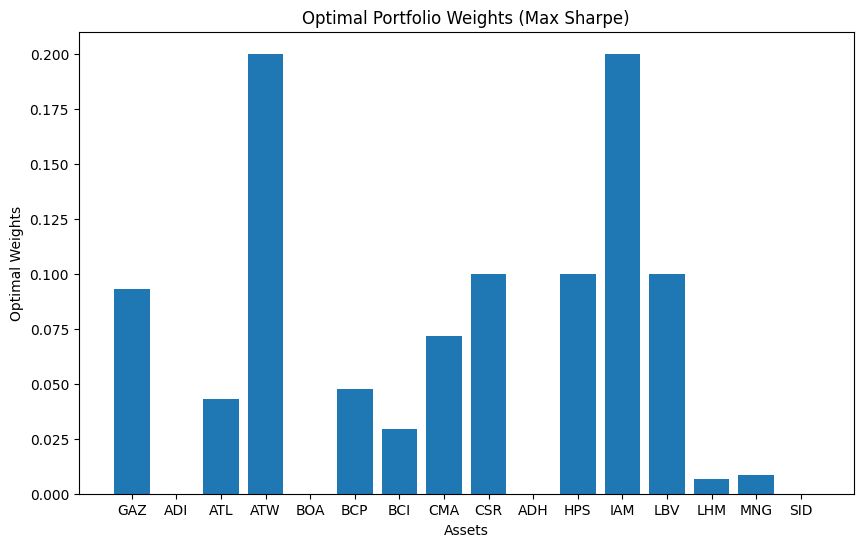

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(stocks_tickers, regulation_compliant_max_sharpe_optimal_weights)

print_optimal_weights_results(regulation_compliant_max_sharpe_optimal_weights)

plt.xlabel("Assets")
plt.ylabel("Optimal Weights")
plt.title("Optimal Portfolio Weights (Max Sharpe)")

plt.show()